In [20]:
## just gonna look at past two weeks of RooTroopNFT mentions and engagement to see if introduction of tweeteroo caused a spike.
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

with open("data_big/at_wabdoteth", "r") as fid:
    mentions = fid.read()
# end with
mentions = mentions.split("Tweet(")[1:]

In [21]:
with open("data_big/at_champtgram", "r") as fid:
    mentionsCH = fid.read()
# end with
mentionsCH = mentionsCH.split("Tweet(")[1:]

In [22]:
dates = []
for mention in mentions:
    dates.append(mention.split("date=datetime.datetime(")[1].split(", tzinfo=")[0])

In [23]:
datesCH = []
for mention in mentionsCH:
    datesCH.append(mention.split("date=datetime.datetime(")[1].split(", tzinfo=")[0])

In [33]:
days = {}
for date in dates[::-1]:
    date = date.replace(" ","")
    if len(date.split(",")) == 6:
        yy,mm,dd,HH,MM,SS = date.split(",")
    else:
        yy,mm,dd,HH,MM = date.split(",")
    if mm != "7":
        continue
    # end if
    day = yy + "-" + mm + "-" + dd
    if day not in days:
        days[day] = 0
    # end if

    days[day] += 1
    #print("days: ", days)
    #input(">>")
# end for

In [34]:
days

{'2022-7-1': 722,
 '2022-7-2': 507,
 '2022-7-3': 536,
 '2022-7-4': 1272,
 '2022-7-5': 1552,
 '2022-7-6': 1402,
 '2022-7-7': 2391,
 '2022-7-8': 3935,
 '2022-7-9': 3860,
 '2022-7-10': 4756,
 '2022-7-11': 5046,
 '2022-7-12': 1547}

In [35]:
daysCH = {}
for date in datesCH[::-1]:
    date = date.replace(" ","")
    if len(date.split(",")) == 6:
        yy,mm,dd,HH,MM,SS = date.split(",")
    else:
        yy,mm,dd,HH,MM = date.split(",")
    # end if/else
    if mm != "7":
        continue
    # end if
    day = yy + "-" + mm + "-" + dd
    if day not in daysCH:
        daysCH[day] = 0
    # end if

    daysCH[day] += 1
# end for

In [36]:
daysCH

{'2022-7-1': 1592,
 '2022-7-2': 566,
 '2022-7-3': 398,
 '2022-7-4': 1047,
 '2022-7-5': 877,
 '2022-7-6': 718,
 '2022-7-7': 2151,
 '2022-7-8': 1951,
 '2022-7-9': 1571,
 '2022-7-10': 553,
 '2022-7-11': 1123,
 '2022-7-12': 797}

In [37]:
xx = []
yy = []

for day in days:    
    #xx.append(day.split("-")[-1])
    xx.append(day.replace("2022-",""))
    yy.append(days[day])

In [38]:
xxCH = []
yyCH = []

for day in daysCH:    
    #xx.append(day.split("-")[-1])
    xxCH.append(day.replace("2022-","").replace("2021-",""))
    yyCH.append(daysCH[day])

In [58]:
slate_grey   = "#708090"
canopy_green = "#8CB76E"
llama_purple = "#4103fc"
poop_brown   = "#7b5c00"

ind = np.arange(len(xx)) # location of x points
print("xx[0]: ", xx[0])
xlabels = ["dud"] + xx[::2] + ["dud"]
width = 0.35

styles = plt.style.available
for style in styles:
    if "seaborn-colorblind" not in style:
        continue
    plt.style.use(style)
    fig = plt.figure(figsize=(10,8))
    plt.bar(ind-width/2.0,yy,   width=width, label="@wabdoteth", color=slate_grey )
    plt.bar(ind+width/2.0,yyCH, width=width, label="@champtgram", color=poop_brown)
    plt.axhline(y=sum(yy  ) / 12.0, color=slate_grey)
    plt.axhline(y=sum(yyCH) / 12.0, color=poop_brown)
    
    plt.legend(fontsize=18)
    plt.title("wabdoteth vs. champtgram", fontsize=24)
    plt.ylabel("mentions", fontsize=21)
    plt.xlabel("date", fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.gca().set_xticklabels(xlabels)
    plt.tight_layout()
    plt.savefig("wab_vs_champ_style_" + style + ".png")
    plt.close()
# end for

xx[0]:  7-1


/var/folders/bq/1kt723454f5bpv_06zkg0s480000gp/T/ipykernel_14681/2899039832.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xlabels)


In [48]:
xx

['7-1',
 '7-2',
 '7-3',
 '7-4',
 '7-5',
 '7-6',
 '7-7',
 '7-8',
 '7-9',
 '7-10',
 '7-11',
 '7-12']

In [90]:
print(plt.rcParams['axes.edgecolor'])
print(plt.rcParams['axes.linewidth'])
print(plt.rcParams['xtick.color'])
print(plt.rcParams['ytick.color'])

.8
1.0
.15
.15


In [91]:
x10 = x1[:8]
x11 = x1[8:]
y10 = y1[:8]
y11 = y1[8:]

slate_grey   = "#708090"
canopy_green = "#8CB76E"
llama_purple = "#4103fc"
poop_brown   = "#7b5c00"

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

for style in styles:
    if "seaborn-colorblind" not in style:
        continue
    plt.style.use(style)
    fig = plt.figure(figsize=(10,8))
    plt.bar(x10,y10, color=poop_brown)
    plt.bar(x11,y11, color=canopy_green)
    plt.axhline(y=sum(y10) / 8.0, color=poop_brown)
    plt.axhline(y=sum(y11) / 8.0, color=canopy_green)
    
    plt.ylabel("@rootroopnft mentions", fontsize=21)
    plt.xlabel("date", fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title("The Tweeteroo Difference", fontsize=24)
    for label in plt.gca().xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    # end for
    plt.tight_layout()
    plt.savefig("tweeteroo_difference_style_" + style + "_thresholds4.png")
    plt.close()
# end for

In [105]:
x10SS = x1SS[:8]
x11SS = x1SS[8:]
y10SS = np.array(y1SS[:8])# * (27.9/63.1)
y11SS = np.array(y1SS[8:])# * (27.9/63.1)

slate_grey   = "#708090"
canopy_green = "#8CB76E"
llama_purple = "#4103fc"
poop_brown   = "#7b5c00"

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

for style in styles:
    if "seaborn-colorblind" not in style:
        continue
    plt.style.use(style)
    fig = plt.figure(figsize=(10,8))
    plt.bar(x10SS,y10SS, color=llama_purple)
    plt.bar(x11SS,y11SS, color=slate_grey)
    plt.axhline(y=np.sum(y10SS) / 8.0, color=llama_purple)
    plt.axhline(y=np.sum(y11SS) / 8.0, color=slate_grey)
    
    plt.ylabel("@sappysealsnft mentions (normalized)", fontsize=21)
    plt.xlabel("date", fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    #plt.title()#"The Tweeteroo Difference", fontsize=24)
    for label in plt.gca().xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    # end for
    plt.tight_layout()
    plt.savefig("tweeteroo_difference_style_" + style + "_thresholds5.png")
    plt.close()
# end for

In [106]:
x10SS = x1SS[:8]
x11SS = x1SS[8:]
y10SS = np.array(y1SS[:8]) * (27.9/63.1)
y11SS = np.array(y1SS[8:]) * (27.9/63.1)

slate_grey   = "#708090"
canopy_green = "#8CB76E"
llama_purple = "#4103fc"
poop_brown   = "#7b5c00"

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

for style in styles:
    if "seaborn-colorblind" not in style:
        continue
    plt.style.use(style)
    fig = plt.figure(figsize=(10,8))
    plt.bar(x10SS,y10SS, color=llama_purple)
    plt.bar(x11SS,y11SS, color=slate_grey)
    plt.axhline(y=np.sum(y10SS) / 8.0, color=llama_purple)
    plt.axhline(y=np.sum(y11SS) / 8.0, color=slate_grey)
    
    plt.ylabel("@sappysealsnft mentions (normalized)", fontsize=21)
    plt.xlabel("date", fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    #plt.title()#"The Tweeteroo Difference", fontsize=24)
    for label in plt.gca().xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    # end for
    plt.tight_layout()
    plt.savefig("tweeteroo_difference_style_" + style + "_thresholds6.png")
    plt.close()
# end for

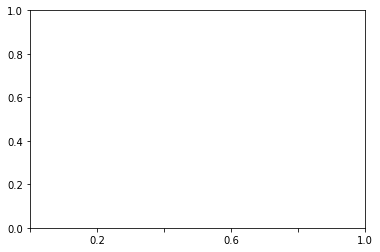

In [28]:
for label in plt.gca().xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

In [37]:
styles = plt.style.available